#Pedro Cunial - 2B
##Estudo Estatistico Sobre Abalones

Neste trabalho, busco realizar uma análise estatística sobre características de Abalones presentes na Tasmânia (Austrália) em 1996. Busco reconhecer padrões e estimar valores sobre a amostra.

Aproveite!

In [9]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import linspace

In [10]:
dados = pd.read_table("abalone.data", sep = ",", names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shocked weight", "Viscera weight", "Shell weight", "Rings"])
dados

,Sex,Length,Diameter,Height,Whole weight,Shocked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


##Amostra Inicial

Para a minha análise inicial, tentei usar uma amostra dos pesos totais dos abalones (carne, concha etc).

###Histograma

Plotei um histograma para ter uma ideia inicial de qual seria o tipo de distribuição que serviria melhor. Pude perceber uma assimetria positiva, o que me levou a crer que trataria de alguma amostra como log-normal ou exponencial-normal.

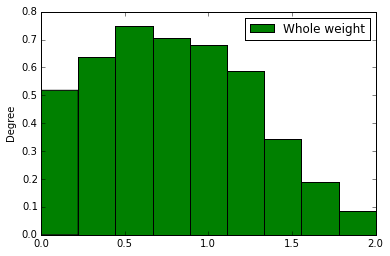

In [11]:
pd.DataFrame.plot(kind="hist", data = dados["Whole weight"], bins = linspace(0,2,10), normed = True, color="g")

In [12]:
dados["Whole weight"].mean()

0.82874215944458

In [13]:
dados["Whole weight"].std()

0.4903890182309973

###Tentativas e erros

Nesta parte, percebi que a amostra que estava usando não funcionava muito bem; Apliquei todos os modelos importados nessa célula à amostra e nenhum deles de fato pareceu representar o que ela se tratava.

O que melhor se adaptou foi a normal, mas mesmo assim o resultado não foi ideal.

Neste momento, percebi que seria melhor mudar a amostra que estava trabalhando, mas preferi deixar o registro do que fiz neste notebook.

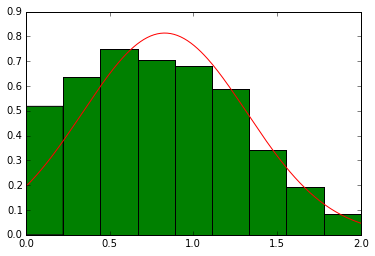

In [14]:
from scipy.stats import chi,f,lognorm,ncf,foldnorm,norm

mean = dados["Whole weight"].mean()
stddev = dados["Whole weight"].std()

x=linspace(0,2,200)
plt.plot(x, norm.pdf(x,loc=mean,scale=stddev), 'r')
plt.hist(x = dados["Whole weight"], bins = linspace(0,2,10), normed = True, color="g")
plt.show()

In [15]:
param = stats.norm.fit( dados["Whole weight"])

In [16]:
param

(0.82874215944457741, 0.49033031361377277)

##Amostra "Final"

Cheguei a conclusão, junto ao professor, que a melhor opção seria realizar a análise de outra amostra ainda neste tema. Optei por trabalhar então com o diâmetro dos abalones.

###Histograma

Com o plotar deste histograma, percebi que a amostra parecia muito com uma normal, ou alguma das suas variações (exponencial-normal, log-normal etc).

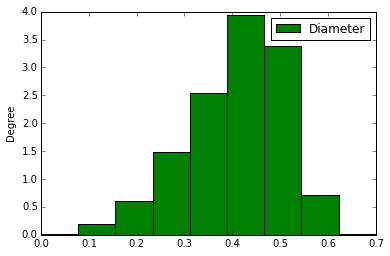

In [17]:
pd.DataFrame.plot(kind="hist", data = dados["Diameter"], bins = linspace(0,.7,10), normed = True, color="g")

In [18]:
y=linspace(0,.7,200)
x_log, s_log, loc_norm = stats.lognorm.fit(dados["Diameter"])

###Testes

Resolvi plotar a normal junto às suas variações e, para a minha surpresa, por mais que usasse os valores do fit, a curva gerada era sempre muito próxima da normal.

Decidi então realizar a análise da minha amostra com base na normal.

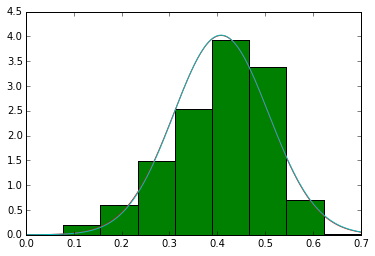

In [19]:
plt.plot(y, norm.pdf(y,loc=dados["Diameter"].mean(),scale=dados["Diameter"].std()), 'r')
plt.plot(y, lognorm.pdf(y, x_log, s_log, loc_norm), "c")
plt.hist(x = dados["Diameter"], bins = linspace(0,.7,10), normed = True, color="g")
plt.show()

In [20]:
med, dsvpad = stats.norm.fit(dados["Diameter"])
med, dsvpad

(0.40788125448886764, 0.099227986099363744)

In [21]:
y=linspace(0,.7,len(dados["Diameter"]))

In [22]:
dados["Diameter"].std()

0.09923986613365918

###Teste com .fit

Para comparar os valores que estimei da amostra com um "palpite melhor", utilizei a função fit do scipy para analisar a amostra. No caso das minhas estimativas, usei os próprios valores de média e desvio padrão da amostra para realizar a minha normal, enquanto o valor estimado pela função fit foi praticamente o mesmo (sendo a diferença tão pequena que chega a ser desconsiderável, dada a própria incerteza de medida do equipamento usado na medição dos abalones).

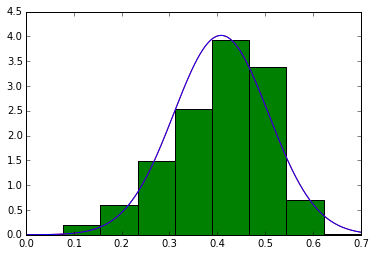

In [23]:

plt.plot(y, norm.pdf(y,loc = dados["Diameter"].mean(),scale=dados["Diameter"].std()), 'r')
plt.plot(y, norm.pdf(y, loc = med, scale = dsvpad), "b")
plt.hist(x = dados["Diameter"], bins = linspace(0,.7,10), normed = True, color="g")
plt.show()

###Frequência relativa acumulada x Função de probabilidade acumulada

Ao plotar ambos as funçõe, percebe-se uma diferença maior entre os dados e o modelo, enquanto nos dados, a sa soma resulta em uma função quase linear, no modelo aplicado, a soma resulta em um modelo sigmoidal, o que indicaria que qualquer valor estimado abaixo de cerca de 0.45 seria abaixo do verdadeiro, enquanto acima deste valor seria maior do que o verdadeiro.

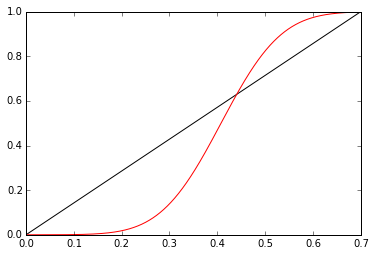

In [32]:
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(dados["Diameter"])):
    acc = (i - 0.5) / len(dados["Diameter"])
    if acc < 0:
        acc = 0.0
    fra.append(acc)
    
plt.plot(y, fra, '-', color='black', label="F.R.A dos dados")
plt.plot(y, norm.cdf(y,loc = dados["Diameter"].mean(),scale=dados["Diameter"].std()), 'r', label = "F.P.A. dos dados")
plt.show()


###Q-Q plot

Assim como na análise das cumilativas, precebemos que os valores estimados abaixo dos pontos que cercam 0.45 são abaixo dos valores verdadeiros, enquanto os acima são superiores aos verdadeiros.

No entanto, as duas curvas são muito próximas na maioria de sua extensão, o que provavelente indicaria que o modelo funciona muito bem para valores entre os quartis 1 e 3, mas não fora deles.

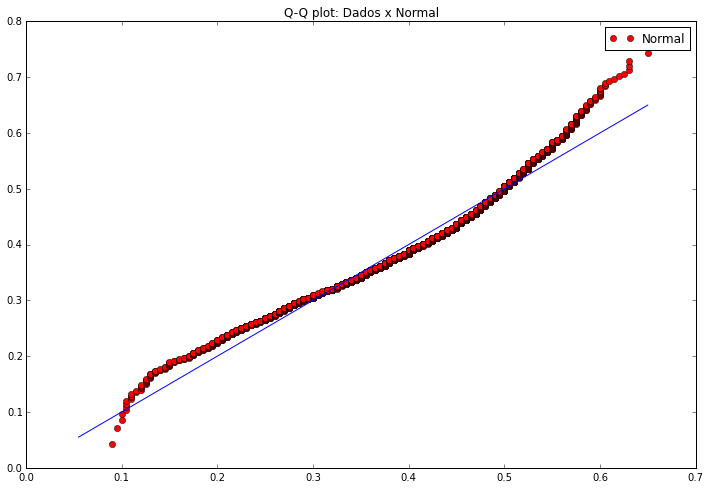

In [33]:
diam = dados["Diameter"].sort(inplace=False)

q_norm = stats.norm.ppf(fra,loc = diam.mean(), scale = diam.std()) # quantis teóricos da normal

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal")

norm_plot, = plt.plot(diam, q_norm, 'o', color="red", label="Normal")

plt.legend(handles=[norm_plot])
plt.plot((min(diam), max(diam)), (min(diam), max(diam)), '-')

In [26]:
def erro_quadratico(fra_dados, quantil_teorico):
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(1, len(fra_dados)):
        dif_quad = (fra_dados[i] - quantil_teorico[i])**2
        eq = eq + dif_quad
    return eq

erro_quadratico_normal = erro_quadratico(diam,q_norm)

print("Erro quadratico da normal:", erro_quadratico_normal)

Erro quadratico da normal: 75.0799156428


###Tabela

Por fim, montei uma tabela com os principais valores desta análise, onde pude comparar os valores estimados e os verdadeiros.

In [27]:
jaspion = norm.pdf(y,loc = dados["Diameter"].mean(),scale=dados["Diameter"].std()).tolist()
jiraya = norm.cdf(y,loc = dados["Diameter"].mean(),scale=dados["Diameter"].std())

frame = {"Diametro real": diam,
         "Diametro segundo a normal": jaspion,
         "Frequência relativa acumulada": jiraya,
         "Função de probabilidade acumulada": q_norm}

tabela = pd.DataFrame(frame)
tabela

,Diametro real,Diametro segundo a normal,Frequência relativa acumulada,Função de probabilidade acumulada
236,0.055,0.000863,0.000020,-inf
238,0.090,0.000869,0.000020,0.043340
2114,0.095,0.000875,0.000020,0.072200
719,0.100,0.000881,0.000020,0.086385
237,0.100,0.000887,0.000020,0.096033
3899,0.105,0.000894,0.000021,0.103409
3837,0.105,0.000900,0.000021,0.109411
1429,0.105,0.000906,0.000021,0.114486
696,0.105,0.000912,0.000021,0.118894
526,0.110,0.000919,0.000021,0.122796


##Conclusão

Pode-se concluir que o diâmetro de abalones tasmânicos em 1996 seguiu um padrão muito semelhante ao da normal, podendo ser analisado firmemente por ela, principalmente nos valores que estão entre os quartis 1 e 3 da amostra.